Group 18

Group Members


1.   Divey Anand        (BITS ID : 2022aa5030)
2.   Shiffin N (BITS ID : 2022aa05055)
3.   Dibyajyoti Sarkar (BITS ID : 2022aa05005)

Assignment Dataset :- Car details







#Task 1 : Import Libraries/Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #plot package
import numpy as np
import missingno as msno
import scipy
import sklearn


In [2]:
from google.colab import files
upload = files.upload()

Saving CAR DETAILS.csv to CAR DETAILS (1).csv


#Task1 : Data Visualization and Exploration

***Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.***

In [3]:
cardataset = pd.read_csv('CAR DETAILS.csv')
cardatasetforkfold = cardataset
print(cardataset.shape)
cardataset.head(2)

(4340, 8)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


**Comment on class imbalance with appropriate visualization method.**

Class imbalance refers to a situation where one class in a classification problem has significantly more samples than the other class. This can be a problem because a classifier trained on an imbalanced dataset may become biased towards the more prevalent class, resulting in poor performance on the minority class.

In [4]:
cardataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


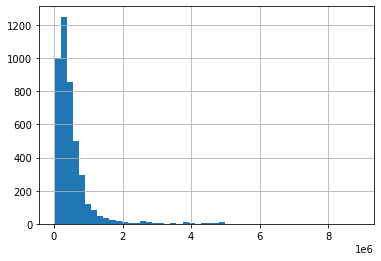

In [5]:
# Create the bar chart to check class imbalance
df = cardataset
df['selling_price'].hist(bins=50)


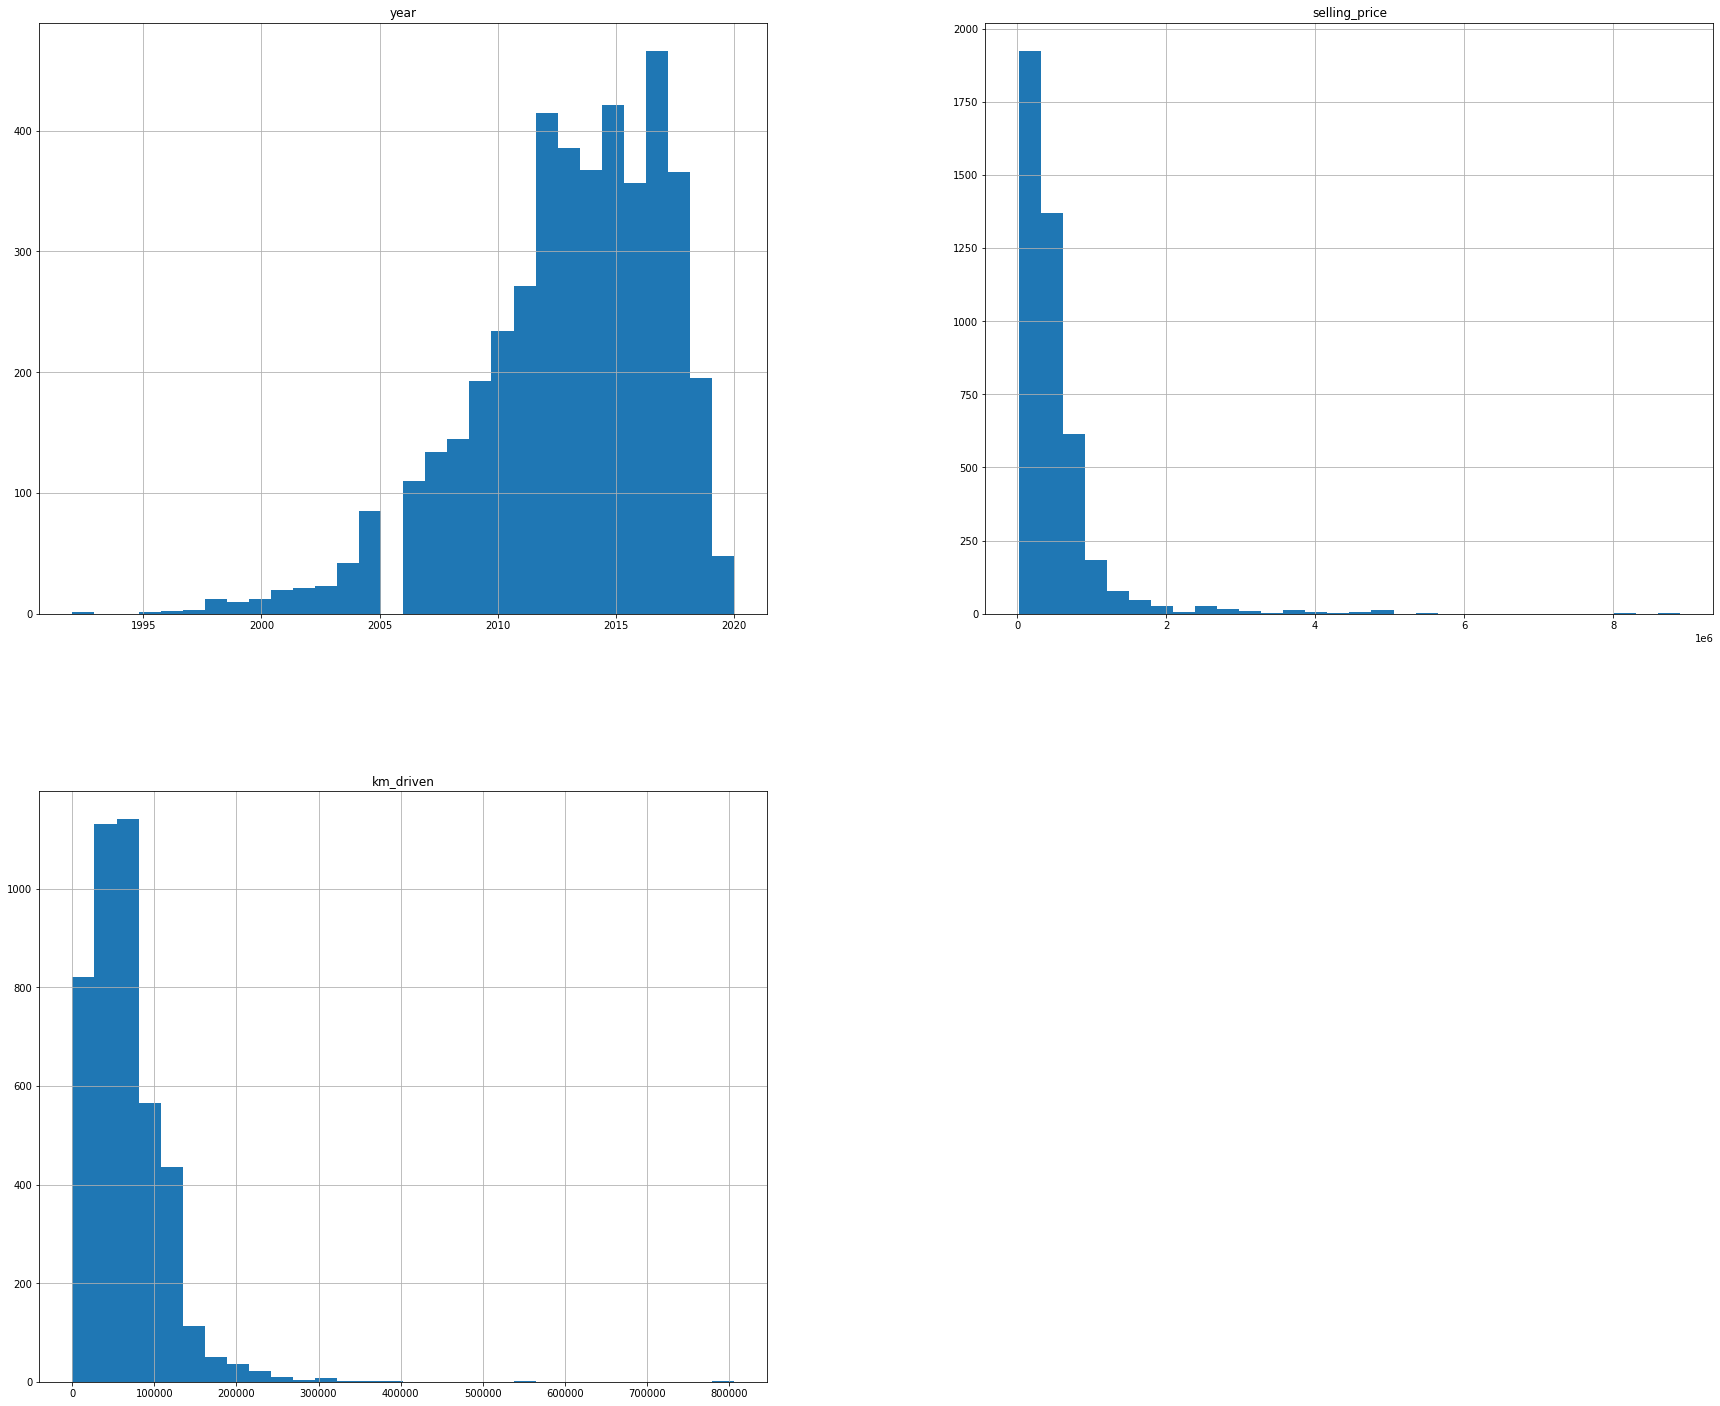

In [6]:
cardataset.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

In [7]:
print(cardataset.selling_price.value_counts())

300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: selling_price, Length: 445, dtype: int64


*Task 2.3 Provide appropriate visualizations to get an insight about the dataset.*

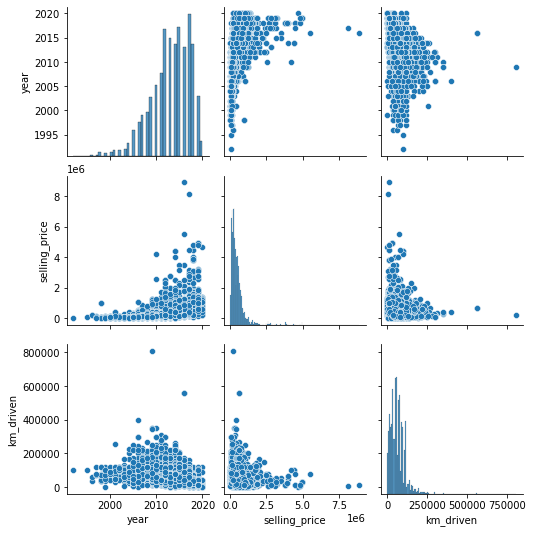

In [8]:
sns.pairplot(cardataset);

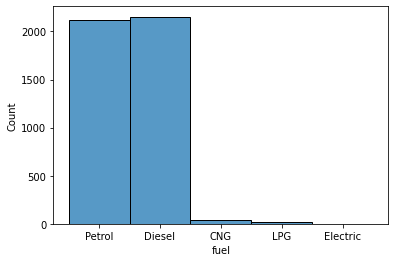

In [9]:
sns.histplot(cardataset['fuel'])

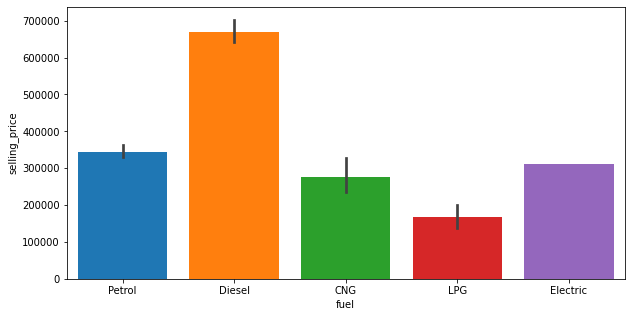

In [10]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "fuel", y = "selling_price", data = cardataset, saturation = 1);

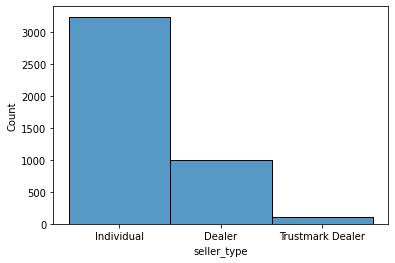

In [11]:
sns.histplot(cardataset['seller_type'])

*#Task 2.4 Do the correlational analysis on the dataset.* Any other visualisation specific to the problem statement.
Provide a visualization for the same.
Will this correlational analysis affect the feature selection that you will perform in the next step? 
Justify your answer. 


In [12]:
cardataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


Correlational analysis is a statistical technique that is used to examine the relationship between two or more variables. It can be used to determine whether there is a correlation between two variables and, if so, the strength and direction of the relationship.

In [13]:
cardataset.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission      

In [14]:
cardataset.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [15]:
cardataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [16]:
cardataset.describe(include = "object")

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


In [17]:
cardataset.corr().style.background_gradient()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [18]:
corr1 = (cardataset["selling_price"].corr(cardataset["year"]))
print("Pearson correlation coefficient between Selling price and year",corr1)
corr2 = (cardataset["selling_price"].corr(cardataset["km_driven"]))
print("Pearson correlation coefficient between Selling price and KM Driven",corr2)
corr3 = (cardataset["year"].corr(cardataset["km_driven"]))
print("Pearson correlation coefficient between KM Driven and year",corr3)

Pearson correlation coefficient between Selling price and year 0.4139216798108551
Pearson correlation coefficient between Selling price and KM Driven -0.19228863054511436
Pearson correlation coefficient between KM Driven and year -0.4196881460829117


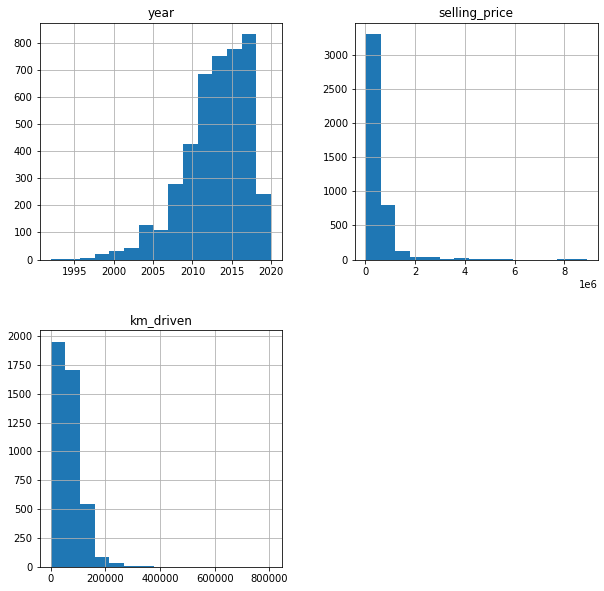

In [19]:
cardataset.hist(figsize = (10, 10), bins = 15, legend = False)
plt.show()

Yes , there is affect on feature selection on correlation analysis. In the above problem we calculate the Pearson correlation coefficient between the variables "var1" and "var2" in the dataset. The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between the two variables, with a value ranging from -1 (strong negative correlation) to 1 (strong positive correlation).
In the given data it is clear from the heat map that there is no correlation between the attributes so we will not be updating the attributes.

## **# 2. Data Pre-processing and cleaning**

**Task 2.1.1** Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters.

Checking for null values

In [20]:
# identifying NULL or Missing Values
cardataset.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

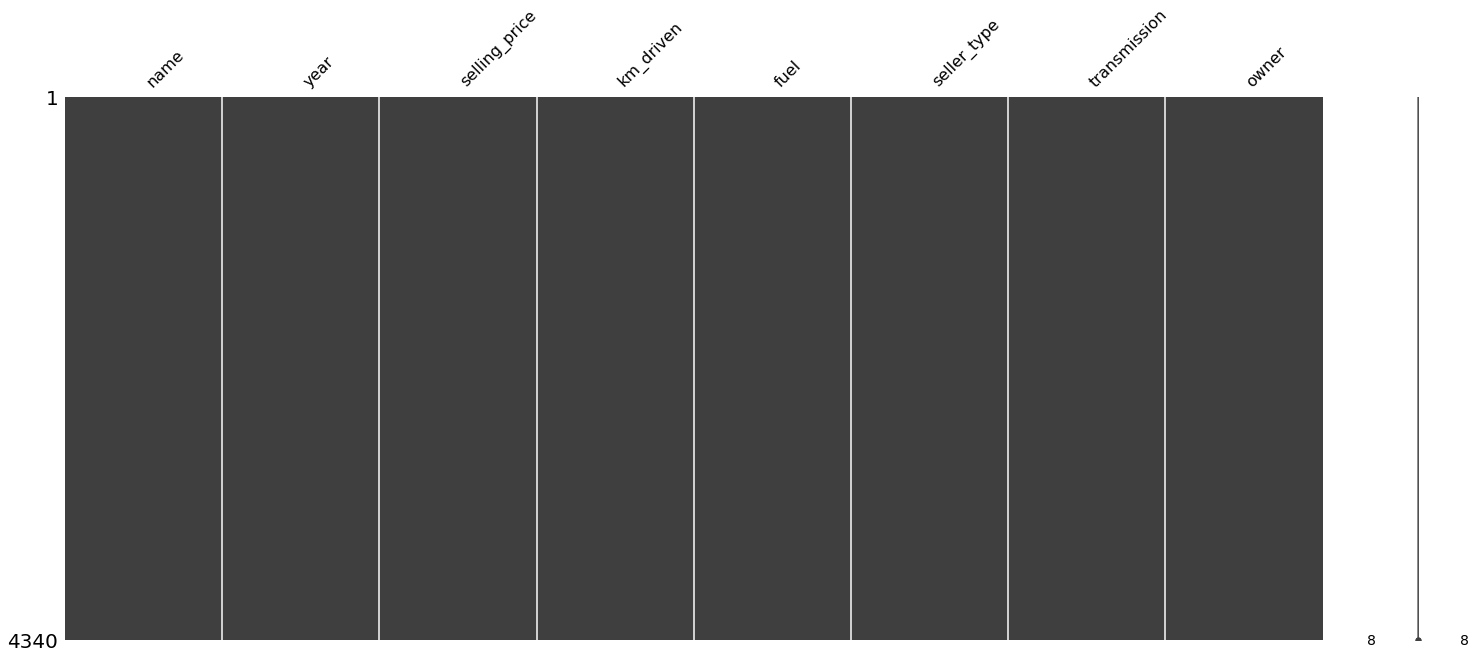

<Figure size 360x360 with 0 Axes>

In [21]:
msno.matrix(cardataset)
plt.figure(figsize = (5,5))
plt.show()

From the matrix plot and the sum of null values we can conclude that there is no null or empty values in the data.

In [22]:
cardataset.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [23]:
cardataset.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [24]:
cardataset.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
cardataset.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [26]:
cardataset.year.unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

From the above data it is clear that there are no outliers for the fuel, seller type, transmission and owner data. The Outliers for textual data can occur due to human errors like different spelling. It is clear that all the values are unique for the attributes which have textual data

In [27]:
len(cardataset.name.unique())

1491

The car name attribute has 1491 unique values which is higher for a dataset of 4000 values  , we can say that name is a column with high cardinality. We will change the name to Company attribute which will reduce the cardinality and remove the name attribute.

In [28]:
company_model = cardataset['name'].str.split(" ", expand = True)
company_model.head()
cardataset['company'] = company_model[0]
cardataset.drop(['name'], axis=1, inplace=True)

In [29]:
len(cardataset.company.unique())

29

As we can see we have reduced the cardinality to 29 and 185

In [30]:
len(cardataset.year.unique())

27

In [31]:
cardataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


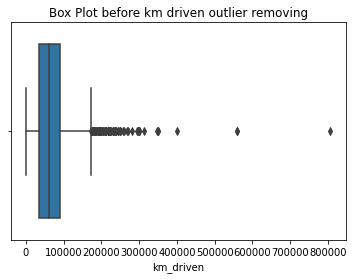

In [32]:
sns.boxplot(cardataset['km_driven'])
plt.title("Box Plot before km driven outlier removing")
plt.show()

In [33]:
print(cardataset['km_driven'].skew())
cardataset['km_driven'].describe()

2.6690569869843133


count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

We can see that the km_driven data is right skewed, so outliers exists. We will remove the outliers using Quantile-based Flooring and Capping.

In [34]:
print(cardataset['km_driven'].quantile(0.95))

140000.0


In [35]:
cardataset['km_driven'] = np.where(cardataset['km_driven'] >140000.0, 140000.0,cardataset['km_driven'])
print(cardataset['km_driven'].skew())

0.3768885260732784


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


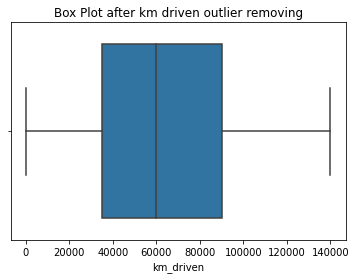

In [36]:
sns.boxplot(cardataset['km_driven'])
plt.title("Box Plot after km driven outlier removing")
plt.show()

We can see that the outliers are removed and skew value also have reduced.

**Task 2.2.2** Apply appropriate feature engineering techniques for them like Standardization, Normalization, etc. Apply the appropriate transformations depending upon your dataset’s structure and complexity. Provide proper justification. Explore a few techniques for identifying feature importance for your feature engineering task.

# Answer as below:

*Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work better. These features can be created by combining existing features, extracting information from text, or by creating new features through a process called feature synthesis.*

Standardization is a common technique used in feature engineering. It involves transforming the values of a feature so that they have a mean of 0 and a standard deviation of 1.

In [37]:
# Implementation of Standardization in Vehicle Dataset

# Select the features to standardize
features_to_standardize = ['selling_price']

# Calculate the mean and standard deviation of each feature
mean = cardataset[features_to_standardize].mean()
std = cardataset[features_to_standardize].std()

# Standardize the features
cardataset[features_to_standardize] = (cardataset[features_to_standardize] - mean) / std
cardataset


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,2007,-0.767658,70000.0,Petrol,Individual,Manual,First Owner,Maruti
1,2007,-0.638023,50000.0,Petrol,Individual,Manual,First Owner,Maruti
2,2012,0.165712,100000.0,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,-0.439250,46000.0,Petrol,Individual,Manual,First Owner,Datsun
4,2014,-0.093557,140000.0,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,-0.162697,80000.0,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,-0.162697,80000.0,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,-0.681234,83000.0,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,0.623755,90000.0,Diesel,Individual,Manual,First Owner,Hyundai


Normalization is another common technique used in feature engineering. It involves scaling the values of a feature so that they have a minimum value of 0 and a maximum value of 1. 

In [38]:
# Select the columns to normalize
columns = ['selling_price', 'km_driven']
df = cardataset
# Normalize the data
df[columns] = (df[columns] - df[columns].mean()) / df[columns].std()
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,2007,-0.767658,0.174522,Petrol,Individual,Manual,First Owner,Maruti
1,2007,-0.638023,-0.365125,Petrol,Individual,Manual,First Owner,Maruti
2,2012,0.165712,0.983992,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,-0.439250,-0.473054,Petrol,Individual,Manual,First Owner,Datsun
4,2014,-0.093557,2.063286,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,-0.162697,0.444345,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,-0.162697,0.444345,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,-0.681234,0.525292,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,0.623755,0.714169,Diesel,Individual,Manual,First Owner,Hyundai


# **3. Model Building [5M]** 


**Task 3.1.** Split the dataset into training and test sets.

Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ; 


Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% 



In [39]:
from sklearn.model_selection import train_test_split

# Load the dataset
X = cardataset.iloc[:, :-1] # select all rows and all columns except the last one
y = cardataset.iloc[:, -1] # select all rows and the last column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)


**Task 3.2** Explore k-fold cross-validation. 

K-fold cross-validation is a resampling procedure used to evaluate the performance of machine learning models. It involves randomly dividing the dataset into k folds or subsets, training the model on k-1 folds and evaluating it on the remaining one. This procedure is then repeated k times with a different fold being used as the evaluation set each time. The average performance across all k iterations is used as the overall performance of the model.

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

# Remove rows with missing target values
cardatasetforkfold.dropna(axis=0, subset=['selling_price'], inplace=True)
y = cardatasetforkfold.selling_price # Target variable             
cardatasetforkfold.drop(['selling_price'], axis=1, inplace=True) # Removing target variable from training data

#train_data.drop(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], axis=1, inplace=True) # Remove columns with null values

# Select numeric columns only
numeric_cols = [cname for cname in cardatasetforkfold.columns if cardatasetforkfold[cname].dtype in ['int64', 'float64']]
X = cardatasetforkfold[numeric_cols].copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

X.head() # Show first 5 training examples


Shape of input data: (4340, 2) and shape of target variable: (4340,)


,year,km_driven
0,2007,0.174522
1,2007,-0.365125
2,2012,0.983992
3,2017,-0.473054
4,2014,2.063286


In [41]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 3472, Test set:868
Fold:2, Train set: 3472, Test set:868
Fold:3, Train set: 3472, Test set:868
Fold:4, Train set: 3472, Test set:868
Fold:5, Train set: 3472, Test set:868


In [42]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())


Scores for each fold: [-0.76370545 -0.77338796 -0.84301836 -0.82906718 -0.93222463]
rmse= 0.91


**Task 3.3 and Task 4.1 & 4.2** Build Model/s using 1) Linear Regression , (SK learn or other libraries can be used)  “Target variable : Selling Price “

In [43]:
data = pd.read_csv('/content/CAR DETAILS.csv')
data.shape

(4340, 8)

In [44]:
data.head().style.background_gradient()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [46]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [48]:
data.describe(include = "object").T

,count,unique,top,freq
name,4340,1491,Maruti Swift Dzire VDI,69
fuel,4340,5,Diesel,2153
seller_type,4340,3,Individual,3244
transmission,4340,2,Manual,3892
owner,4340,5,First Owner,2832


In [49]:
data.corr().style.background_gradient()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


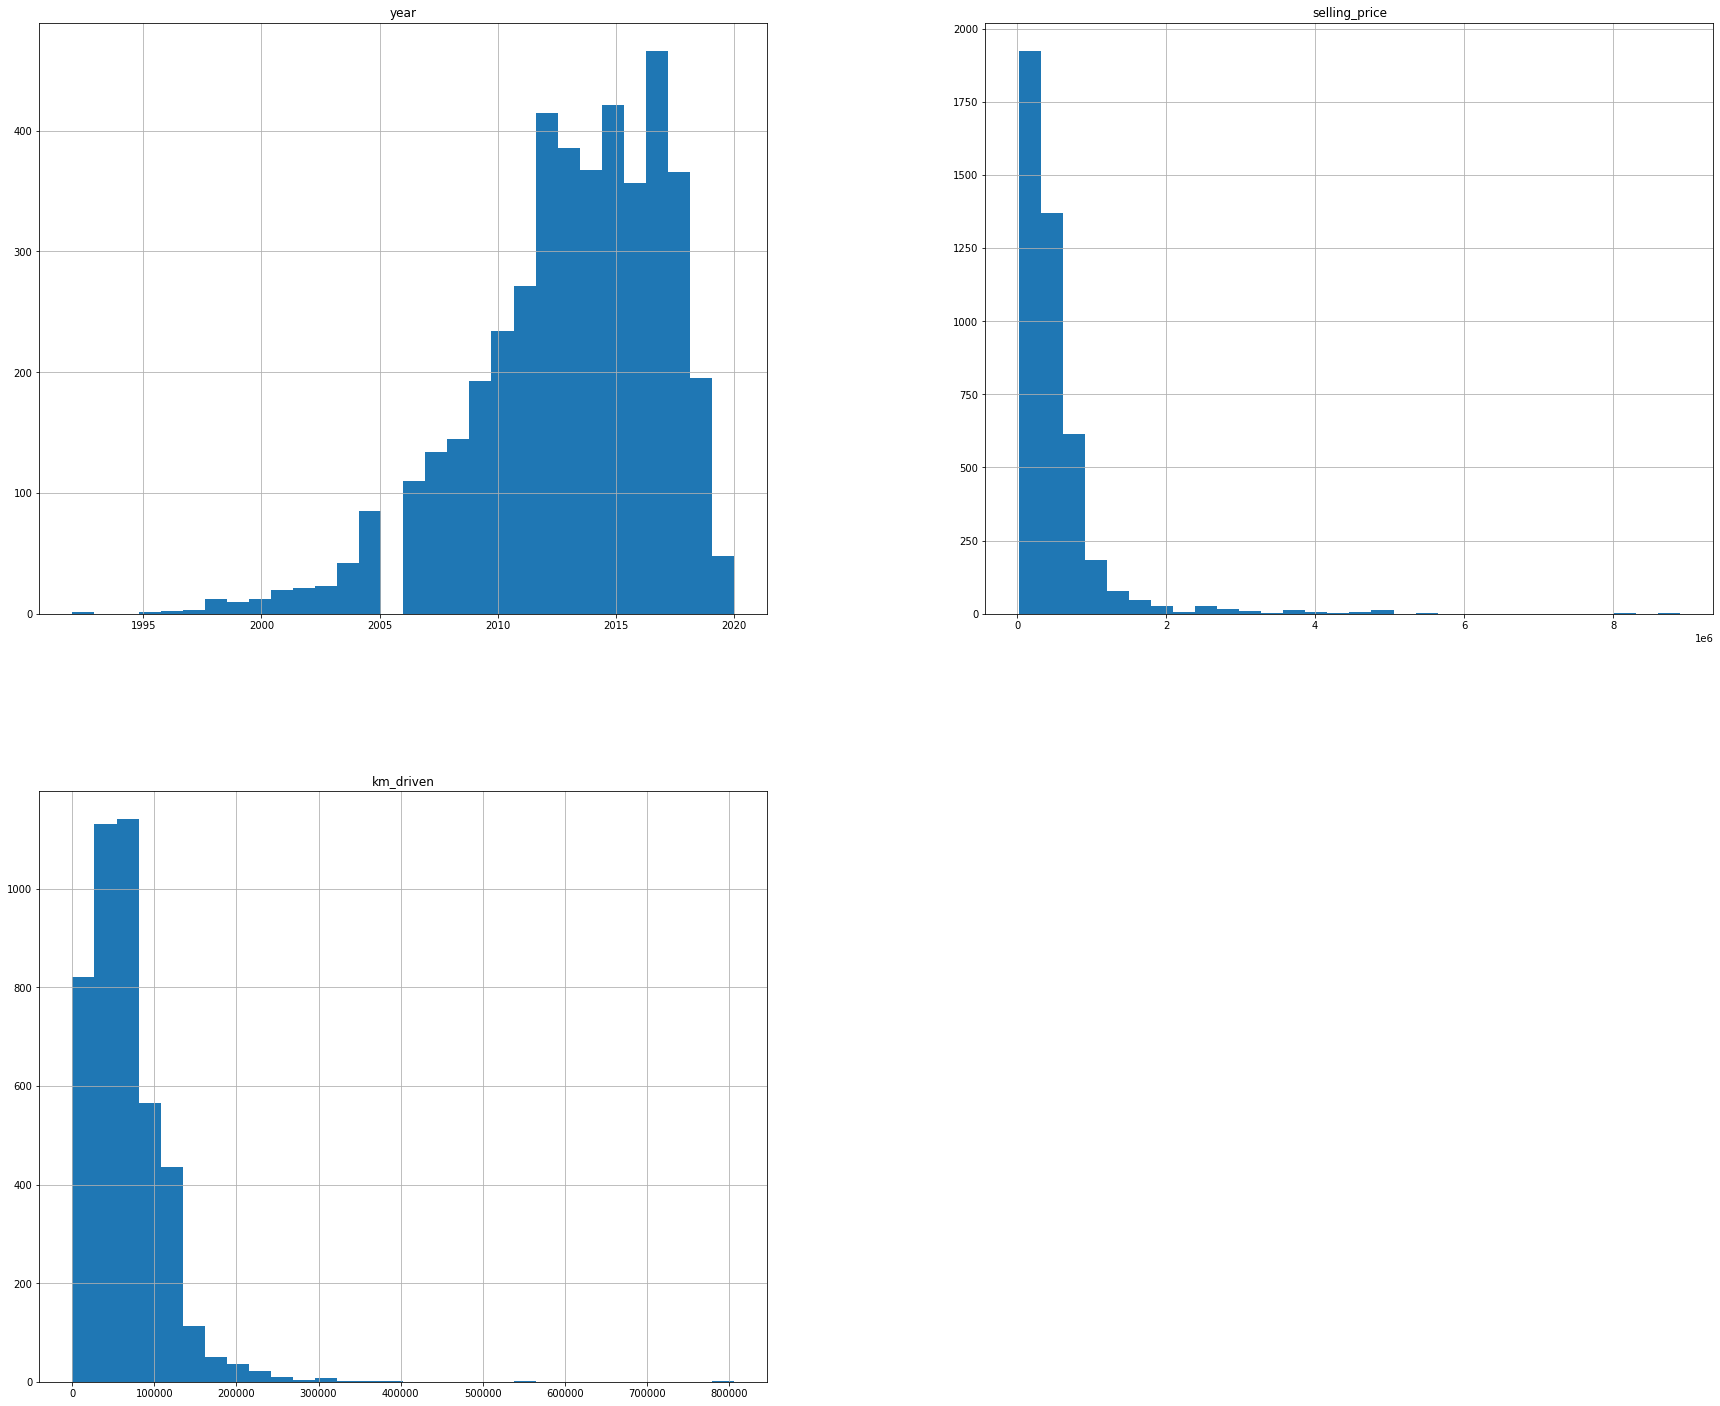

In [50]:
data.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

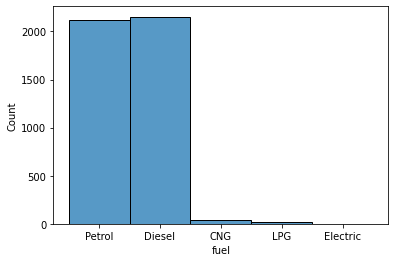

In [51]:
sns.histplot(data['fuel'])

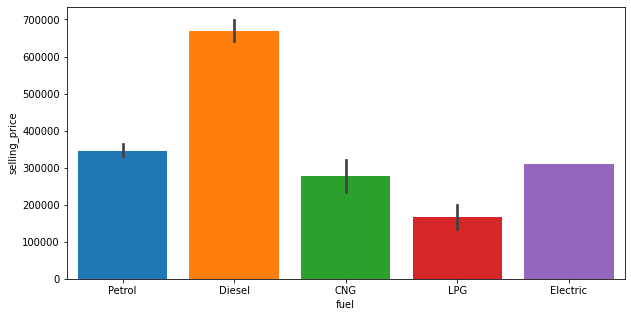

In [52]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "fuel", y = "selling_price", data = data, saturation = 1);

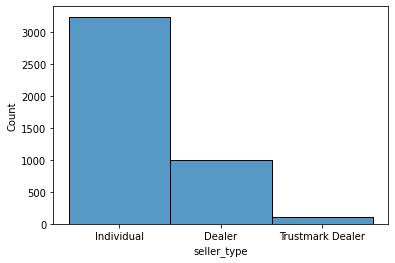

In [53]:
sns.histplot(data['seller_type'])

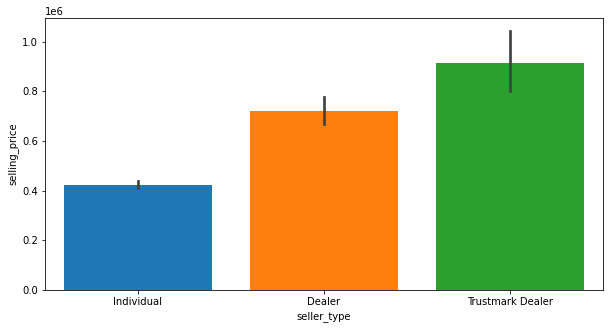

In [54]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "seller_type", y = "selling_price", data = data, saturation = 1);

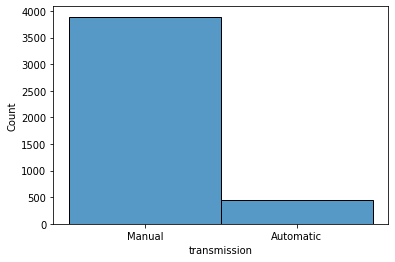

In [55]:
sns.histplot(data['transmission'])

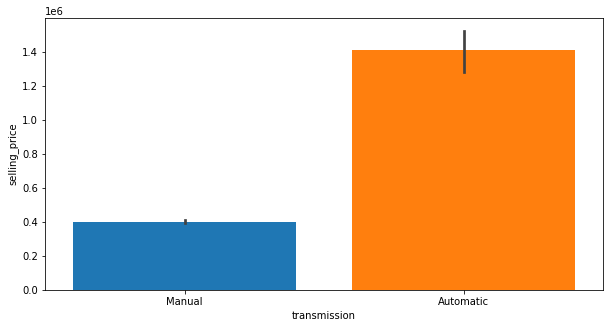

In [56]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "transmission", y = "selling_price", data = data, saturation = 1);

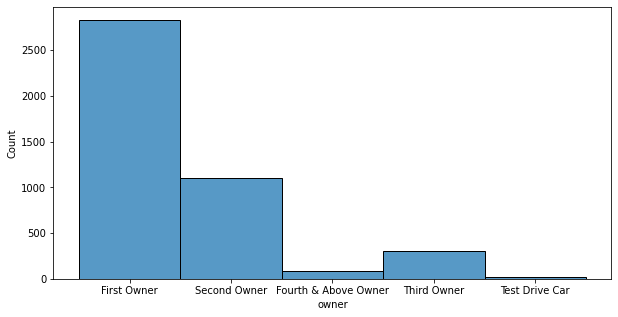

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data['owner'])

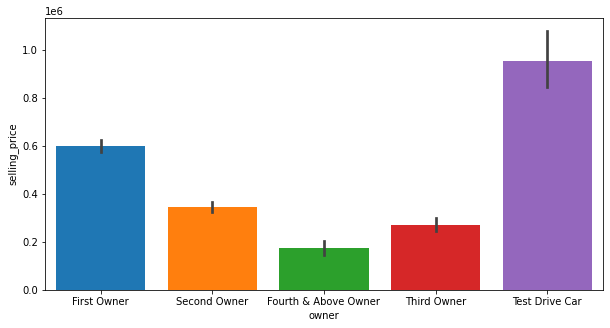

In [58]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "owner", y = "selling_price", data = data, saturation = 1);

In [59]:
for i in range(data.shape[0]):
    data['name'][i] = data['name'][i].split()[0]
    

<ipython-input-59-851a63321d25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'][i] = data['name'][i].split()[0]


In [60]:
data.head().style.background_gradient()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [61]:
data.tail().style.background_gradient()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [62]:
n_data = pd.get_dummies(data, columns = ['name',"fuel","seller_type","transmission","owner"])

In [63]:
from sklearn.impute import SimpleImputer
col = n_data.columns
imp = SimpleImputer()
n_data = pd.DataFrame(imp.fit_transform(n_data), columns = col)

In [64]:
n_data.head().style.background_gradient()

,year,selling_price,km_driven,name_Ambassador,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,name_Datsun,name_Fiat,name_Force,name_Ford,name_Honda,name_Hyundai,name_Isuzu,name_Jaguar,name_Jeep,name_Kia,name_Land,name_MG,name_Mahindra,name_Maruti,name_Mercedes-Benz,name_Mitsubishi,name_Nissan,name_OpelCorsa,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007.000000,60000.000000,70000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,2007.000000,135000.000000,50000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,2012.000000,600000.000000,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,2017.000000,250000.000000,46000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,2014.000000,450000.000000,141000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [65]:
n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          4340 non-null   float64
 1   selling_price                 4340 non-null   float64
 2   km_driven                     4340 non-null   float64
 3   name_Ambassador               4340 non-null   float64
 4   name_Audi                     4340 non-null   float64
 5   name_BMW                      4340 non-null   float64
 6   name_Chevrolet                4340 non-null   float64
 7   name_Daewoo                   4340 non-null   float64
 8   name_Datsun                   4340 non-null   float64
 9   name_Fiat                     4340 non-null   float64
 10  name_Force                    4340 non-null   float64
 11  name_Ford                     4340 non-null   float64
 12  name_Honda                    4340 non-null   float64
 13  nam

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(n_data), columns= n_data.columns)
x = data_scaled.drop(['selling_price'], axis = 1)
y = data_scaled['selling_price']

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

#Case 1:   Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ; 

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.20, shuffle = True, random_state = 1)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
pre = model.predict(x_test)
print('Accuracy : ',mae(y_test,pre))
score1 = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

Accuracy :  0.019191861135996146
The accuracy of our model is 75.0%


In [67]:
model = KNeighborsRegressor(1)
model.fit(x_train, y_train)
pre = model.predict(x_test)
print('Accuracy : ',mae(y_test,pre))
score = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

Accuracy :  0.012796037022045088
The accuracy of our model is 86.0%


In [68]:
model = SVR()
model.fit(x_train, y_train)
pre = model.predict(x_test)
print('Accuracy : ',mae(y_test,pre))
score2 = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score2, 2) *100))

Accuracy :  0.04165586206729451
The accuracy of our model is 40.0%


In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50)
model.fit(x_train, y_train)
pre = model.predict(x_test)
from sklearn.metrics import mean_absolute_error as mae
print('Accuracy : ',mae(y_test,pre))
score3 = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score3, 2) *100))

Accuracy :  0.012340612681462177
The accuracy of our model is 86.0%


In [70]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 600 ,learning_rate = .02)
model.fit(x_train, y_train, early_stopping_rounds = 5, eval_set=[(x_test, y_test)], verbose = False)
pred = model.predict(x_test)
print('Accuracy : ', mae(y_test, pred))
score4 = r2_score(y_test, pred)
print("The accuracy of our model is {}%".format(round(score4, 2) *100))

[14:07:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy :  0.015035251467448765
The accuracy of our model is 86.0%


In [71]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-squared: {}'.format(metrics.r2_score(y_test, pred)))

Mean Absolute Error: 0.015035251467448765
Mean Squared Error: 0.0005284701788602517
Root Mean Squared Error: 0.022988479263758438
R-squared: 0.8623570842650545


Text(0, 0.5, 'prediction')

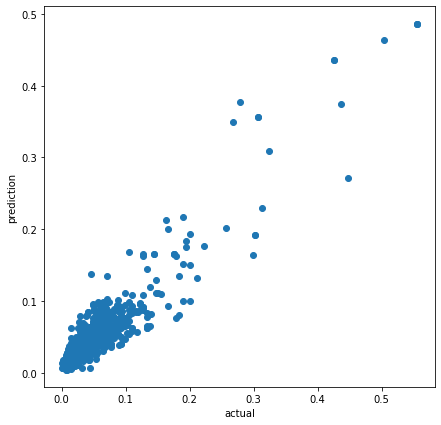

In [72]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred);
plt.xlabel("actual")
plt.ylabel("prediction")

**CASE 2 Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%  **

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(n_data), columns= n_data.columns)
x = data_scaled.drop(['selling_price'], axis = 1)
y = data_scaled['selling_price']

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

#Case 2:   Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%   

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.90, shuffle = True, random_state = 1)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
pre = model.predict(x_test)
print('Accuracy : ',mae(y_test,pre))
score1 = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

Accuracy :  0.022090355147053233
The accuracy of our model is 63.0%


In [74]:
model = KNeighborsRegressor(1)
model.fit(x_train, y_train)
pre = model.predict(x_test)
print('Accuracy : ',mae(y_test,pre))
score = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

Accuracy :  0.024077158667884475
The accuracy of our model is 40.0%


In [75]:
model = SVR()
model.fit(x_train, y_train)
pre = model.predict(x_test)
print('Accuracy : ',mae(y_test,pre))
score2 = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score2, 2) *100))

Accuracy :  0.07151939443472403
The accuracy of our model is -51.0%


In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50)
model.fit(x_train, y_train)
pre = model.predict(x_test)
from sklearn.metrics import mean_absolute_error as mae
print('Accuracy : ',mae(y_test,pre))
score3 = r2_score(y_test, pre)
print("The accuracy of our model is {}%".format(round(score3, 2) *100))

Accuracy :  0.01931102478747858
The accuracy of our model is 62.0%


In [77]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 600 ,learning_rate = .02)
model.fit(x_train, y_train, early_stopping_rounds = 5, eval_set=[(x_test, y_test)], verbose = False)
pred = model.predict(x_test)
print('Accuracy : ', mae(y_test, pred))
score4 = r2_score(y_test, pred)
print("The accuracy of our model is {}%".format(round(score4, 2) *100))

[14:07:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy :  0.018618944858592303
The accuracy of our model is 70.0%


In [78]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-squared: {}'.format(metrics.r2_score(y_test, pred)))

Mean Absolute Error: 0.018618944858592303
Mean Squared Error: 0.0012564303200278725
Root Mean Squared Error: 0.03544616086444162
R-squared: 0.6950093312444355


Text(0, 0.5, 'prediction')

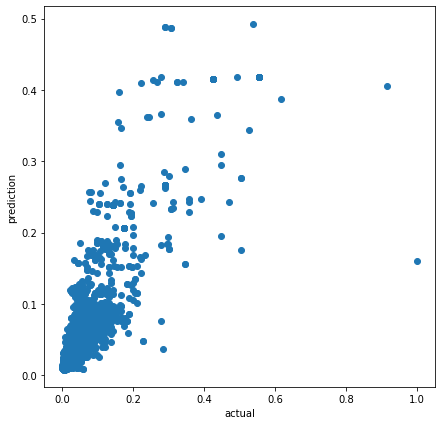

In [79]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred);
plt.xlabel("actual")
plt.ylabel("prediction")

********** End of assignment *******************